# 线性回归

## 一个特征的线性回归

数据来自于[斯坦福Deep Learning课程](http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=DeepLearning&doc=exercises/ex2/ex2.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

### 读取数据

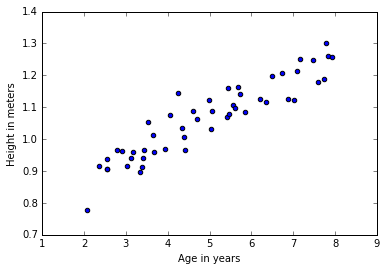

In [2]:
# 读取数据
x_list = []
with open('data/boys-height/x.dat') as x_data:
    for line in x_data.readlines():
        # x0 = 1, x1 = float(line.strip())
        x_list.append([1, float(line.strip())])

y_list = []
with open('data/boys-height/y.dat') as y_data:
    for line in y_data.readlines():
        y_list.append(float(line.strip()))

x_arr = np.array(x_list)
y_arr = np.array(y_list)
        
# 绘制数据
plt.scatter(x_arr[:, 1], y_arr)
plt.xlabel('Age in years')
plt.ylabel('Height in meters')
plt.show()

### 求解参数

通过normal equation求解得到的参数：theta_0=0.750162537001，theta_1=0.0638811658258
通过gradient descent迭代1800次后求解得到的参数：theta_0=0.750161166749，theta_1=0.0638814151262


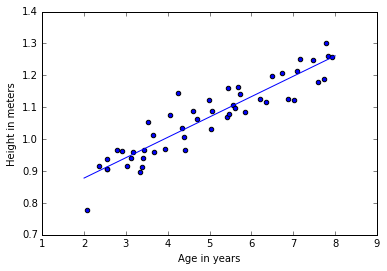

In [3]:
def gradient_descent(_x_arr, _y_arr, _theta_0, _theta_1, _alpha=0.07):
    """ 梯度下降函数
    
    :param _x_arr: 各个特征的值，包含了截距，所以在单特征时_x_arr的维度是 m×2
    :param _y_arr: 标签
    :param _theta_0: 
    :param _theta_1: 
    :param _alpha: 步长
    :return: 
    """
    _y_arr_predict = _x_arr[:,0] * _theta_0 + _x_arr[:,1] * _theta_1
    
    _theta_0 -= _alpha * np.mean(_y_arr_predict - _y_arr)
    _theta_1 -= _alpha * np.mean((_y_arr_predict - _y_arr) * _x_arr[:,1])
    
    return _theta_0, _theta_1

# 直接求解（normal equation）
x_mean = np.mean(x_arr[:,1])
theta_1 = np.sum(y_arr * (x_arr[:,1] - x_mean)) / (np.sum(x_arr[:, 1]**2) - np.sum(x_arr[:, 1])**2 / len(x_list))
theta_0 = np.mean(y_arr - theta_1 * x_arr[:, 1])
print('通过normal equation求解得到的参数：theta_0=%s，theta_1=%s' % (theta_0, theta_1))

# 用梯度下降方法来求解
theta_0 = 0; theta_1 = 0  # 初始参数
theta_0_new = 0; theta_1_new = 0  # 迭代得到的参数
count = 1
while count < 2000:  # 迭代次数上限
    count += 1
    theta_0_new, theta_1_new = gradient_descent(x_arr, y_arr, theta_0, theta_1)
    # 如果迭代后 参数更新很小，就可以停止迭代了
    if abs(theta_0_new - theta_0) < 0.1e-7 and abs(theta_1_new - theta_1) < 0.1e-7:
        break
    theta_0 = theta_0_new
    theta_1 = theta_1_new
print('通过gradient descent迭代%s次后求解得到的参数：theta_0=%s，theta_1=%s' % (count, theta_0, theta_1))

# 绘制拟合直线
line_x = [2, 8]
line_y = [theta_0 + theta_1 * x for x in line_x]
# 绘制样本
plt.scatter([x[1] for x in x_list], y_list)
plt.plot(line_x, line_y)
plt.xlabel('Age in years'); plt.ylabel('Height in meters')

plt.show()

### 绘制损失函数等高线、损失函数与参数的关系

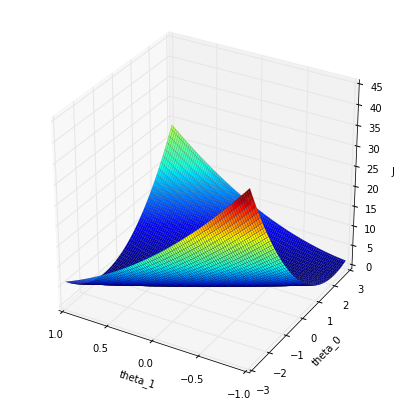

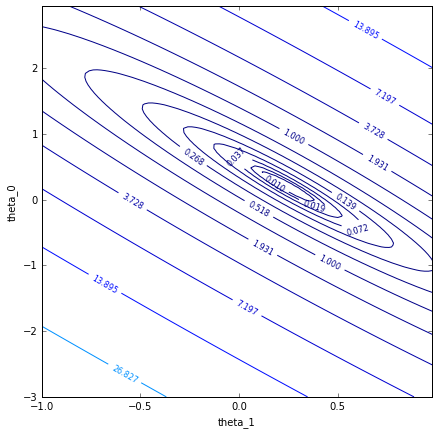

In [4]:
# 计算各个参数下的损失函数的值
theta_0_arr = np.arange(-3, 3, 0.06)
theta_1_arr = np.arange(-1, 1, 0.02)
z_vals = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        z_vals[i][j] = np.mean((theta_0_arr[j] + theta_1_arr[i] * x_arr[:, 1] - y_arr)**2) / 2

# 绘制损失函数与参数的关系
fig = plt.figure(1, figsize=(7, 7))
ax1 = fig.gca(projection='3d')
ax1.set_xlim([1, -1])
theta_1_arr, theta_0_arr = np.meshgrid(theta_1_arr, theta_0_arr)
ax1.plot_surface(theta_1_arr, theta_0_arr, z_vals,  rstride=2, cstride=1, cmap=cm.jet, linewidth=0.1, shade=True)
ax1.set_xlabel('theta_1'); ax1.set_ylabel('theta_0'); ax1.set_zlabel('J')

# 绘制损失函数的等高线
plt.figure(2, figsize=(7, 7))
CS = plt.contour(theta_1_arr, theta_0_arr,  z_vals, levels=np.logspace(-2, 2, 15))
plt.clabel(CS, inline=1, fontsize=8)
plt.xlabel('theta_1'); plt.ylabel('theta_0')

plt.show()